# MP-API Tutorial

## Basics

`mp-api` is the new version of the older `pymatgen` that serves as the API for [The Materials Project](https://next-gen.materialsproject.org/) database.

In [ ]:
#!pip install pymatgen
!pip install mp-api

`MPRester` is the main object for interacting with the online database.

In [1]:
#from pymatgen.ext.matproj import MPRester
#from pymatgen.io.cif import CifParser
from mp_api.client import MPRester
import matplotlib.pyplot as plt
import os

Initializing the `MPRester` object needs your personal API key - this is available free of charge upon registration

Whereas the formula does not uniquly identify the system, the material ID does - one formula can still correspond to several structures (and thus database entries)

In [3]:
# Materials Project API key
MPAPI = os.environ["MPAPI"]
mpr = MPRester(MPAPI)

# Input the chemical formula of the material you are interested in
# this one has ID of mp-19017
#formula = "LiFePO4"
#matid = "mp-19017"
formula = "Si3N4"
matid = "mp-988"

# Get the data of the material with the given formula
data = mpr.get_structure_by_material_id(matid)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Print the data
for item in data:
    print(item)

[-1.37939402  5.43287148  2.17889931] Si
[2.20984275 1.52184646 0.72629977] Si
[4.01530731 3.91102606 0.72629977] Si
[-0.21303619  2.67470336  2.17889931] Si
[1.59242837 5.06388296 2.17889931] Si
[5.18166514 1.15285794 0.72629977] Si
[-4.45560576e-06  4.39048815e+00  2.17889931e+00] N
[3.80227558 2.19524127 0.72629977] N
[4.82331675 4.41147347 2.17889931] N
[-1.40879721  6.38285194  0.72629977] N
[2.42982936 4.61435662 0.72629977] N
[1.37244176 1.9713728  2.17889931] N
[-1.02104563  2.17425595  0.72629977] N
[5.21106833 0.20287748 2.17889931] N


An example of using one formula to find out all possible structures

In [5]:
structures = mpr.get_structures(formula)

Retrieving MaterialsDoc documents:   0%|          | 0/16 [00:00<?, ?it/s]

In [6]:
print(len(structures))
for s in structures:
    print(s)

16
Full Formula (Si45 N60)
Reduced Formula: Si3N4
abc   :  11.320697  10.897540  10.437169
angles:  89.095649  88.754461  90.517472
pbc   :       True       True       True
Sites (105)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Si    0.679752  0.750372  0.68361         -0
  1  Si    0.554587  0.554311  0.319801        -0
  2  Si    0.873072  0.560213  0.685867        -0
  3  Si    0.123427  0.592239  0.556008        -0
  4  Si    0.22315   0.070959  0.568281        -0
  5  Si    0.502484  0.533341  0.653202        -0
  6  Si    0.359998  0.418771  0.155921        -0
  7  Si    0.889132  0.212786  0.704039         0
  8  Si    0.414828  0.750694  0.838357        -0
  9  Si    0.014526  0.178262  0.438105        -0
 10  Si    0.251947  0.646861  0.042656        -0
 11  Si    0.61777   0.717718  0.884934         0
 12  Si    0.705333  0.38386   0.088686        -0
 13  Si    0.421116  0.293857  0.386429        -0
 14  Si    0.55

## Obtain the density of states (DOS)

$$
N(\epsilon) = \frac{1}{\mathcal{V}} \sum_{n\boldsymbol{k}} \delta(\epsilon - \epsilon_{n\boldsymbol{k}})
$$

In [7]:
dos = mpr.get_dos_by_material_id(matid)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

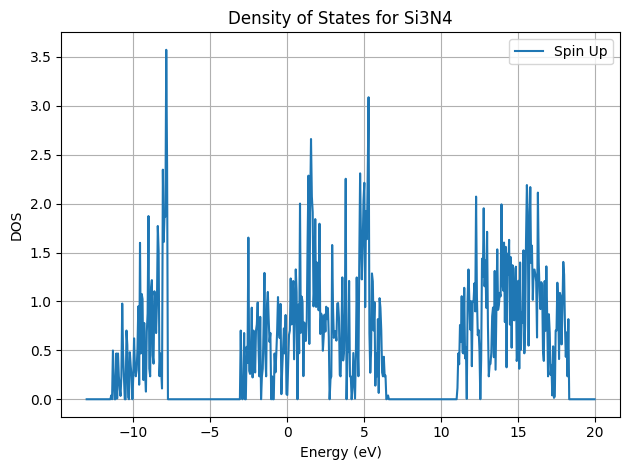

In [8]:
tdos = dos.get_densities()
ener = dos.energies

plt.plot(ener, tdos, label='Spin Up')
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.legend()
plt.title('Density of States for %s' % formula)
plt.grid(True)
plt.tight_layout()
plt.show()

## Obtain the material ID from formula

In [9]:
mpr.get_material_ids('AgI')

Retrieving MaterialsDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

[MPID(mp-22894),
 MPID(mp-22915),
 MPID(mp-22919),
 MPID(mp-22925),
 MPID(mp-567809),
 MPID(mp-568927),
 MPID(mp-580941),
 MPID(mp-684580),
 MPID(mp-1182980)]

In [10]:
mpr.get_structure_by_material_id('mp-22894')

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Structure Summary
Lattice
    abc : 4.65855721 4.658555584797037 7.55273917
 angles : 90.0 90.0 119.99998908769899
 volume : 141.9508120425751
      A : 4.65855721 3e-08 0.0
      B : -2.32927705 4.03442791 -0.0
      C : 0.0 -0.0 7.55273917
    pbc : True True True
PeriodicSite: Ag (-1.293e-06, 2.69, 0.007433) [0.3333, 0.6667, 0.0009841]
PeriodicSite: Ag (2.329, 1.345, 3.784) [0.6667, 0.3333, 0.501]
PeriodicSite: I (-1.293e-06, 2.69, 2.862) [0.3333, 0.6667, 0.3789]
PeriodicSite: I (2.329, 1.345, 6.638) [0.6667, 0.3333, 0.8789]

In [11]:
mpr.get_entries('mp-22894')

Retrieving ThermoDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

[mp-22894-GGA ComputedStructureEntry - Ag2 I2       (AgI)
 Energy (Uncorrected)     = -9.8327   eV (-2.4582  eV/atom)
 Correction               = -0.7580   eV (-0.1895  eV/atom)
 Energy (Final)           = -10.5907  eV (-2.6477  eV/atom)
 Energy Adjustments:
   MP2020 anion correction (I): -0.7580   eV (-0.1895  eV/atom)
 Parameters:
   potcar_spec            = [{'titel': 'PAW_PBE Ag 06Sep2000', 'hash': 'e8ffa02fe3f3a51338ac1ac91ae968b9'}, {'titel': 'PAW_PBE I 08Apr2002', 'hash': 'f4ff16a495dd361ff5824ee61b418bb0'}]
   is_hubbard             = False
   hubbards               = {}
   run_type               = GGA
 Data:
   oxide_type             = None
   aspherical             = True
   last_updated           = 2020-05-03 01:37:19.876000
   task_id                = mp-1440887
   material_id            = mp-22894
   oxidation_states       = {'Ag': 1.0, 'I': -1.0}
   run_type               = GGA,
 mp-22894-R2SCAN ComputedStructureEntry - Ag2 I2       (AgI)
 Energy (Uncorrected)     = -93.

## Read a custom CIF file

In [13]:
from pymatgen.core.structure import Structure

# Load the structure from the .cif file.
structure = Structure.from_file("cif/perovskite-2d.cif")

# Get the number of sites (atoms) in the structure.
num_atoms = len(structure.sites)

print(f"Number of atoms in the unit cell: {num_atoms}")

Number of atoms in the unit cell: 128


## Band structure of MoS2

In [15]:
with MPRester(api_key=MPAPI) as mpr:
    bandstructure = mpr.get_bandstructure_by_material_id("mp-1023924")

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
from pymatgen.electronic_structure.plotter import BSPlotter

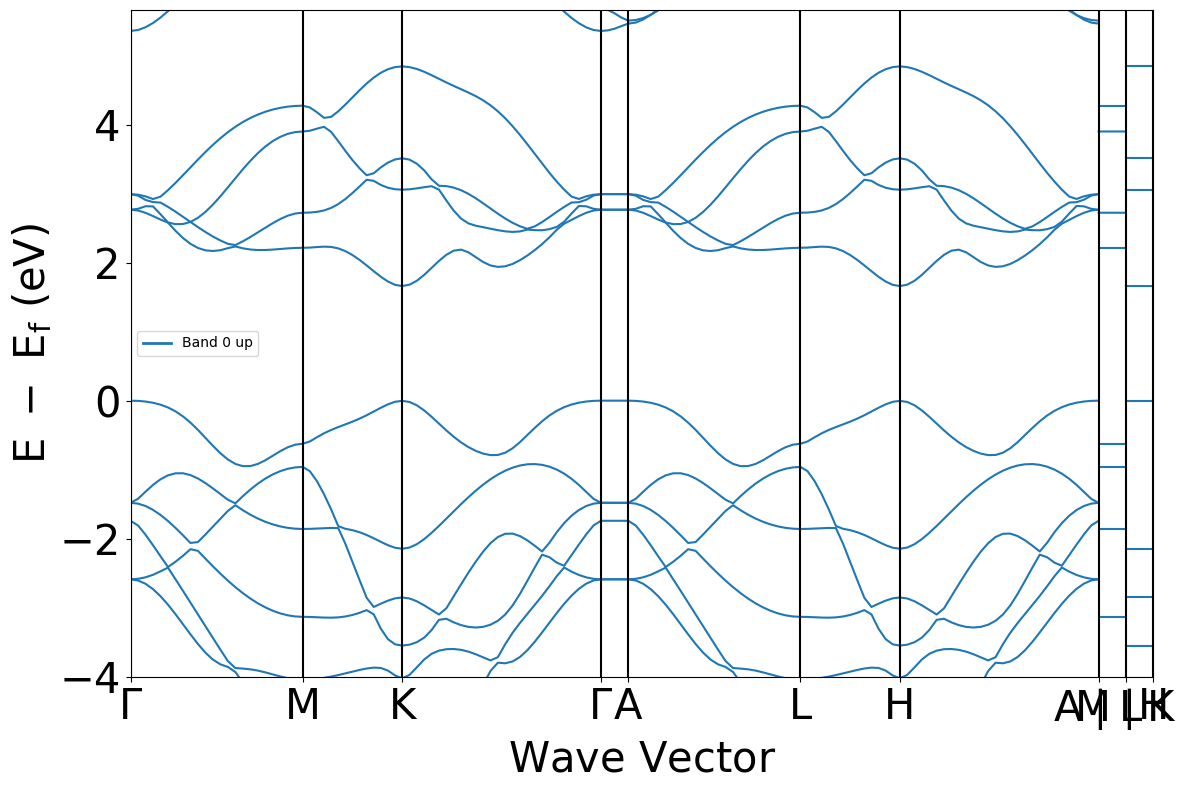

In [58]:
plotter = BSPlotter(bandstructure)
plot = plotter.get_plot()

Get the information about the band gap

In [63]:
gap = bandstructure.get_band_gap()

# Print the band gap details
print(f"Band Gap: {gap['energy']} eV")
print(f"Direct Band Gap: {'Yes' if gap['direct'] else 'No'}")
print(f"Transition: {gap['transition']}")

Band Gap: 1.6605999999999999 eV
Direct Band Gap: No
Transition: \Gamma-H


Get the information about the valence bond maximum (VBM)

In [66]:
bandstructure.get_vbm()

{'band_index': defaultdict(list, {<Spin.up: 1>: [11]}),
 'kpoint_index': [0, 66, 67],
 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint at 0x1486d9f6b970>,
 'energy': -1.8818,
 'projections': {<Spin.up: 1>: array([[0.0116, 0.0022, 0.0022],
         [0.    , 0.    , 0.    ],
         [0.    , 0.0692, 0.0692],
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         [0.5749, 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ]])}}

## Querying the database

Let's search for all materials containing Mo and S with a band gap betwen 0.5 and 1.0 eV. We can limiting the data we are interested in by providing `fields` to speed up the query.

In [115]:
with MPRester(MPAPI) as mpr:
    systems = mpr.materials.summary.search(elements=["Mo", "S"], 
                              band_gap=(0.5, 1.0),
                              fields=["material_id", "band_gap"])

Retrieving SummaryDoc documents:   0%|          | 0/175 [00:00<?, ?it/s]

The number of materials that satisfy the given query.

In [116]:
len(systems)

175

Get the list of all values of band gaps.

In [117]:
gaps = [g.band_gap for g in systems]

Calculate the average band gap for this subclass of systems.

In [119]:
import numpy as np

print(np.average(gaps))

0.6919331428571429
